In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose, STL


In [29]:
# Download Reliance Industries NSE data
ticker = "RELIANCE.NS"

df = yf.download(
    ticker,
    start="2020-01-01",
    end=None,
    progress=False
)

# Use Adjusted Close if available
df = df[['Close']].dropna()
df.head()


Price,Close
Ticker,RELIANCE.NS
Date,
2020-01-01,675.324219
2020-01-02,686.821228
2020-01-03,687.648804
2020-01-06,671.700684
2020-01-07,682.034546


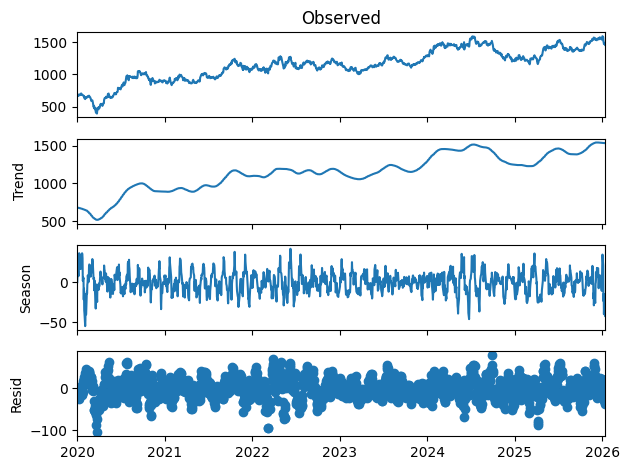

In [30]:
# STL Decomposition (Additive)
# Using period=30 as a default for daily data visualization
stl = STL(df['Close'], period=30)
res_add = stl.fit()
fig = res_add.plot()
plt.show()


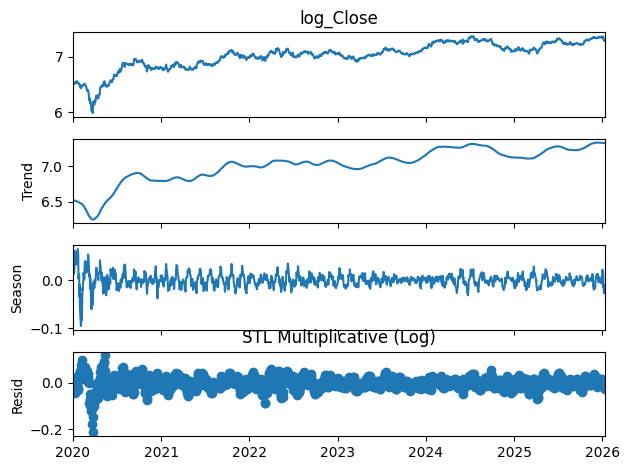

In [31]:
# STL Decomposition (Multiplicative)
# Applied via Log transformation
df['log_Close'] = np.log(df['Close'])
stl_mul = STL(df['log_Close'], period=30)
res_mul = stl_mul.fit()
fig = res_mul.plot()
plt.title('STL Multiplicative (Log)')
plt.show()


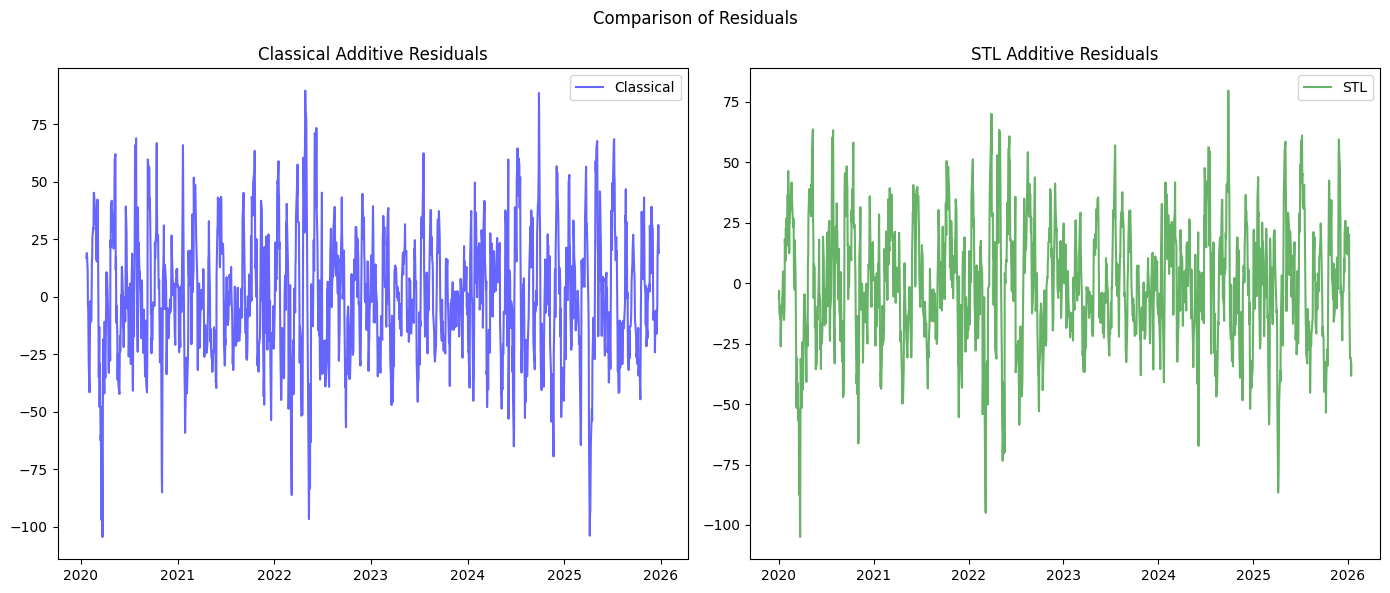

In [32]:
# Comparison: Classical vs STL
classical_res = seasonal_decompose(df['Close'], model='additive', period=30)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(classical_res.resid, label='Classical', color='blue', alpha=0.6)
plt.title('Classical Additive Residuals')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(res_add.resid, label='STL', color='green', alpha=0.6)
plt.title('STL Additive Residuals')
plt.legend()

plt.suptitle('Comparison of Residuals')
plt.tight_layout()
plt.show()


In [33]:
from statsmodels.tsa.stattools import adfuller, kpss

def check_stationarity(series):
    # Augmented Dickey-Fuller Test
    print("Results of Dickey-Fuller Test:")
    adf_test = adfuller(series, autolag='AIC')
    adf_results = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in adf_test[4].items():
        adf_results[f'Critical Value ({key})'] = value
    print(adf_results)

    print("\nResults of KPSS Test:")
    kpss_test = kpss(series, regression='c', nlags="auto")
    kpss_results = pd.Series(kpss_test[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
    for key, value in kpss_test[3].items():
        kpss_results[f'Critical Value ({key})'] = value
    print(kpss_results)

# Usage:
check_stationarity(df['Close'])


Results of Dickey-Fuller Test:
Test Statistic                   -1.807761
p-value                           0.376615
#Lags Used                        0.000000
Number of Observations Used    1498.000000
Critical Value (1%)              -3.434723
Critical Value (5%)              -2.863471
Critical Value (10%)             -2.567798
dtype: float64

Results of KPSS Test:
Test Statistic            4.673083
p-value                   0.010000
Lags Used                25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/tmp/ipykernel_25570/2898337156.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")


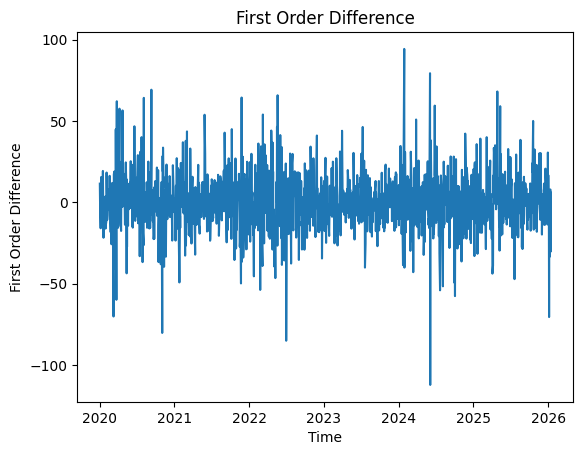

In [34]:
first_order_diff = df['Close'].diff()
plt.plot(first_order_diff)
plt.title('First Order Difference')
plt.xlabel('Time')
plt.ylabel('First Order Difference')
plt.show()

In [35]:
print(first_order_diff.head(30))

Ticker      RELIANCE.NS
Date                   
2020-01-01          NaN
2020-01-02    11.497009
2020-01-03     0.827576
2020-01-06   -15.948120
2020-01-07    10.333862
2020-01-08    -5.122192
2020-01-09    15.590210
2020-01-10    -0.156616
2020-01-13    -1.766907
2020-01-14    -6.397156
2020-01-15    -2.482849
2020-01-16     6.285217
2020-01-17    19.281067
2020-01-20   -21.763733
2020-01-21     0.693420
2020-01-22    -0.246155
2020-01-23    -2.907715
2020-01-24    -2.371094
2020-01-27    -6.710266
2020-01-28   -15.567871
2020-01-29     3.623535
2020-01-30   -16.149414
2020-01-31   -14.359985
2020-02-03   -11.698303
2020-02-04    18.296814
2020-02-05     9.886414
2020-02-06     4.160400
2020-02-07   -10.803528
2020-02-10     0.872375
2020-02-11     7.672058


In [36]:
second_order_diff = df['Close'].diff().diff()
print(second_order_diff.head(30))

Ticker      RELIANCE.NS
Date                   
2020-01-01          NaN
2020-01-02          NaN
2020-01-03   -10.669434
2020-01-06   -16.775696
2020-01-07    26.281982
2020-01-08   -15.456055
2020-01-09    20.712402
2020-01-10   -15.746826
2020-01-13    -1.610291
2020-01-14    -4.630249
2020-01-15     3.914307
2020-01-16     8.768066
2020-01-17    12.995850
2020-01-20   -41.044800
2020-01-21    22.457153
2020-01-22    -0.939575
2020-01-23    -2.661560
2020-01-24     0.536621
2020-01-27    -4.339172
2020-01-28    -8.857605
2020-01-29    19.191406
2020-01-30   -19.772949
2020-01-31     1.789429
2020-02-03     2.661682
2020-02-04    29.995117
2020-02-05    -8.410400
2020-02-06    -5.726013
2020-02-07   -14.963928
2020-02-10    11.675903
2020-02-11     6.799683


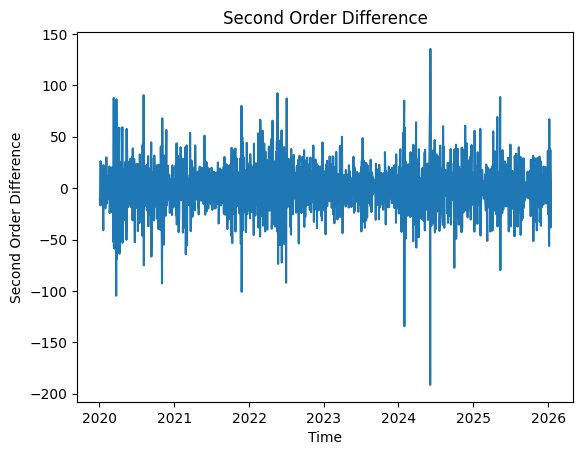

In [37]:
plt.plot(df['Close'].diff().diff())
plt.title('Second Order Difference')
plt.xlabel('Time')
plt.ylabel('Second Order Difference')
plt.show()


### Logarithmic transformations

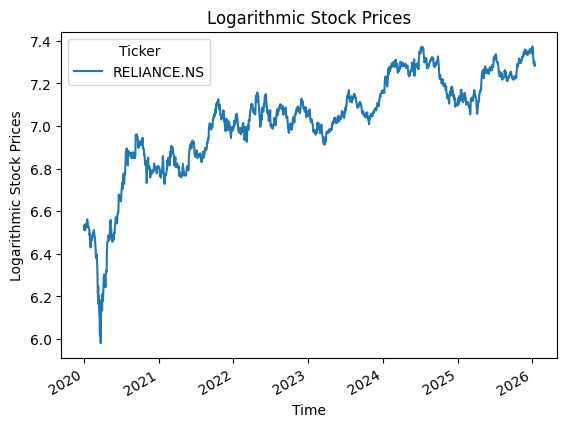

In [47]:
rel_stock_prices=df['Close']
prices_log=np.log(rel_stock_prices)
prices_log.plot()
plt.title('Logarithmic Stock Prices')
plt.xlabel('Time')
plt.ylabel('Logarithmic Stock Prices')
plt.show()


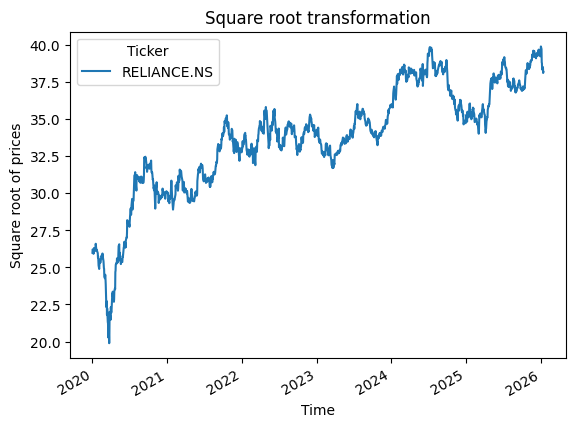

In [42]:
### sqrt transformations
prices_sqrt = np.sqrt(rel_stock_prices)
prices_sqrt.plot()
plt.title('Square root transformation')
plt.xlabel('Time')
plt.ylabel('Square root of prices')
plt.show()

In [52]:
type(df['Close'])
df['Close'].shape
df.columns


MultiIndex([(    'Close', 'RELIANCE.NS'),
            ('log_Close',            '')],
           names=['Price', 'Ticker'])

In [53]:
prices_series = df['Close']

# If it’s DataFrame with single column, squeeze it
if isinstance(prices_series, pd.DataFrame):
    prices_series = prices_series.squeeze()  # becomes Series

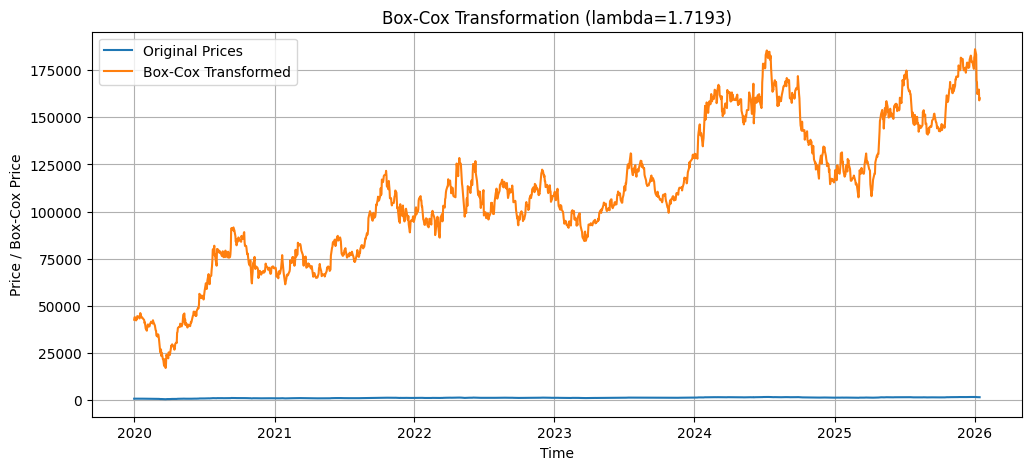

In [54]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np

# --- Get Close column as 1D Series ---
prices_series = df['Close']
if isinstance(prices_series, pd.DataFrame):
    prices_series = prices_series.squeeze()

# --- Ensure numeric and drop NaNs ---
prices_series = pd.to_numeric(prices_series, errors='coerce')
prices_series = prices_series.dropna()

# --- Ensure strictly positive values for Box-Cox ---
prices_array = prices_series.to_numpy(dtype=float)
if np.any(prices_array <= 0):
    prices_array = prices_array + 1e-6  # tiny shift

# --- Apply Box-Cox ---
prices_box_cox, fitted_lambda = stats.boxcox(prices_array)

# --- Convert back to Series with original index ---
prices_box_cox_series = pd.Series(prices_box_cox, index=prices_series.index)

# --- Plot original vs Box-Cox ---
plt.figure(figsize=(12,5))
plt.plot(prices_series, label='Original Prices')
plt.plot(prices_box_cox_series, label='Box-Cox Transformed')
plt.title(f'Box-Cox Transformation (lambda={fitted_lambda:.4f})')
plt.xlabel('Time')
plt.ylabel('Price / Box-Cox Price')
plt.legend()
plt.grid(True)
plt.show()


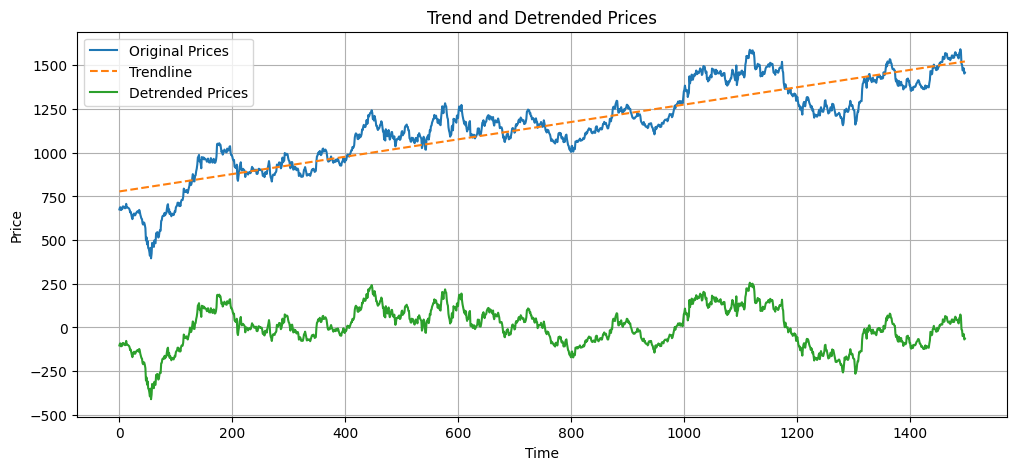

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get Close column as 1D numeric array
prices_series = df['Close']

# If it is a DataFrame with single column, squeeze to Series
if isinstance(prices_series, pd.DataFrame):
    prices_series = prices_series.squeeze()

# Convert to numeric and drop NaNs
prices_series = pd.to_numeric(prices_series, errors='coerce').dropna()

# Ensure 1D NumPy array
y = prices_series.to_numpy(dtype=float)
x = np.arange(len(y))  # time index

# Step 2: Fit linear trend (degree=1)
trend_coef = np.polyfit(x, y, 1)  # [slope, intercept]

# Step 3: Create polynomial function
trend_poly = np.poly1d(trend_coef)

# Step 4: Evaluate trendline at x-values
trendline = trend_poly(x)

# Step 5: Detrend
prices_detrended = y - trendline

# Step 6: Plot everything
plt.figure(figsize=(12,5))
plt.plot(x, y, label='Original Prices')
plt.plot(x, trendline, label='Trendline', linestyle='--')
plt.plot(x, prices_detrended, label='Detrended Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Trend and Detrended Prices')
plt.legend()
plt.grid(True)
plt.show()


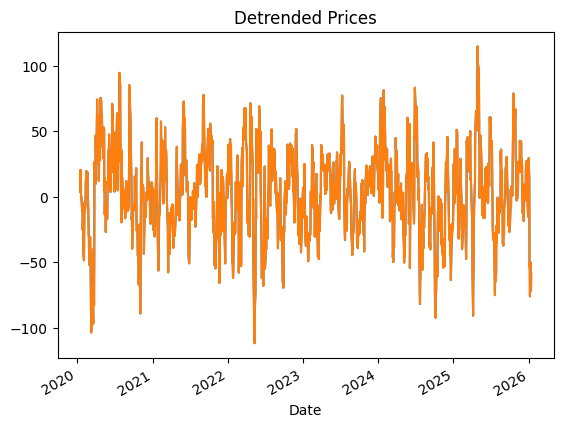

In [60]:
window=12
prices_ma=prices_series.rolling(window=window).mean()
prices_detrended=prices_series-prices_ma
prices_detrended.plot()
plt.title('Detrended Prices')
prices_detrended.dropna(inplace=True)
prices_detrended.plot()
plt.show()
